In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Configure Chrome options to disable loading CSS
chrome_options = Options()
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--blink-settings=imagesEnabled=false")
chrome_options.add_argument("--disable-features=NetworkService")
chrome_options.add_argument("--dns-prefetch-disable")
chrome_options.add_argument("--disable-features=VizDisplayCompositor")

# Create a WebDriver instance
driver = webdriver.Chrome(options=chrome_options)

# Initialize the data dictionary to store all years' data
all_years_data = {}

# Iterate over the years
for year in range(2008, 2025):

    # URL of the IPL points table for the current year
    url = f"https://www.iplt20.com/points-table/men/{year}"

    # Load the URL
    driver.get(url)

    # Wait for the table to be present
    wait = WebDriverWait(driver, 10)

    # Find and extract data between <td> tags
    table = wait.until(EC.presence_of_element_located((By.ID, "pointsdata")))
    tr_tags = table.find_elements(By.TAG_NAME, "tr")

    td_contents = []
    for tr_tag in tr_tags:
        td_tags = tr_tag.find_elements(By.TAG_NAME, "td")
        td_content = [td_tag.text.strip() for td_tag in td_tags]
        td_contents.append(td_content)

    # Find and extract text inside <th> tags with class "text-white"
    table = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "ih-td-tab")))
    th_tags = table.find_elements(By.CSS_SELECTOR, "th")
    text_list = [th_tag.text.strip() for th_tag in th_tags]

    # Add 'Qualified/Not Qualified' column
    text_list.append('Qualified')

    # Create a dictionary to store the data for the current year
    data_dict = {}

    # Populate the dictionary with column names as keys
    for th_tag in text_list:
        data_dict[th_tag.lower()] = []

    # Populate the dictionary with row values
    for td_content in td_contents:
        for i, th_tag in enumerate(text_list):
            if th_tag.lower() == 'qualified':
                team_index = i - 1  # Assuming 'Qualified' column is after the team name
                if len(td_content) > team_index:  # Check if the team index is within the bounds
                    team_element = tr_tags[td_contents.index(td_content)].find_element(By.CLASS_NAME, "ih-t-color")
                    if team_element.find_elements(By.CLASS_NAME, "ih-pt-ic") and team_element.find_element(By.CLASS_NAME, "ih-pt-ic").find_elements(By.CSS_SELECTOR, "span.standings_qualified"):
                        data_dict[th_tag.lower()].append(1)
                    else:
                        data_dict[th_tag.lower()].append(0)
            else:
                data_dict[th_tag.lower()].append(td_content[i])

    if '' in data_dict:
        data_dict.pop('', None)

    # Store the data for the current year in the all_years_data dictionary
    all_years_data[year] = data_dict

# Display the data for all years
print("Data for all years:")
for year, data_dict in all_years_data.items():
    print(f"IPL {year} Points Table:")
    print(data_dict)


driver.quit()


Data for all years:
IPL 2008 Points Table:
{'pos': ['1', '2', '3', '4', '5', '6', '7', '8'], 'team': ['RR', 'PBKS', 'CSK', 'DD', 'MI', 'KKR', 'RCB', 'DEC'], 'p': ['14', '14', '14', '14', '14', '14', '14', '14'], 'w': ['11', '10', '8', '7', '7', '6', '4', '2'], 'l': ['3', '4', '6', '6', '7', '7', '10', '12'], 'nr': ['0', '0', '0', '1', '0', '1', '0', '0'], 'nrr': ['0.632', '0.509', '-0.192', '0.342', '0.57', '-0.147', '-1.16', '-0.467'], 'for': ['2245/261.1', '2352/259.5', '2241/264.2', '2001/233.2', '2080/249.1', '1845/242.4', '1983/272.4', '2229/270'], 'against': ['2153/270.2', '2271/265.5', '2195/253.1', '2031/246.4', '2096/269.3', '1718/221.4', '2205/261.3', '2307/264.3'], 'pts': ['22', '20', '16', '15', '14', '13', '8', '4'], 'recent form': ['L\nW\nW\nW\nW', 'W\nL\nW\nW\nW', 'W\nL\nL\nW\nL', 'W\nN\nW\nL\nW', 'W\nL\nL\nL\nW', 'W\nN\nL\nL\nL', 'L\nW\nW\nL\nL', 'L\nL\nL\nL\nL'], 'qualified': [1, 1, 1, 1, 0, 0, 0, 0]}
IPL 2009 Points Table:
{'pos': ['1', '2', '3', '4', '5', '6', '7', '

In [2]:
team_colors = {
    'PBKS' : 'D50F28',
    'DD' : '021346',
    'CSK' : 'EED201',
    'GL' : 'E25627',
    'MI' : '1230D6',
    'RCB' : 'C01F23',
    'KTK' : 'EB4917',
    'KKR' : '452858',
    'PWI' : '387A95',
    'DC' : '2937CE',
    'GT' : '3C4A63',
    'RPS' : 'DF4AAB',
    'RR' : 'DF3C65',
    'LSG' : '3C4874',
    'DEC' : '354D5E',
    'SRH' : 'FF5131',
}

import matplotlib.colors as mcolors


colors = {}
for team, hex_color in team_colors.items():
    rgba_color = mcolors.to_rgba('#' + hex_color)
    colors[team] = rgba_color

colors

{'PBKS': (0.7333333333333333, 0.0784313725490196, 0.09803921568627451, 1.0),
 'DD': (0.00784313725490196, 0.07450980392156863, 0.27450980392156865, 1.0),
 'CSK': (0.9333333333333333, 0.8235294117647058, 0.00392156862745098, 1.0),
 'GL': (0.8862745098039215, 0.33725490196078434, 0.15294117647058825, 1.0),
 'MI': (0.07058823529411765, 0.18823529411764706, 0.8392156862745098, 1.0),
 'RCB': (0.7607843137254902, 0.0784313725490196, 0.07450980392156863, 1.0),
 'KTK': (0.9215686274509803, 0.28627450980392155, 0.09019607843137255, 1.0),
 'KKR': (0.27058823529411763, 0.1568627450980392, 0.34509803921568627, 1.0),
 'PWI': (0.2196078431372549, 0.47843137254901963, 0.5843137254901961, 1.0),
 'DC': (0.1607843137254902, 0.21568627450980393, 0.807843137254902, 1.0),
 'GT': (0.23529411764705882, 0.2901960784313726, 0.38823529411764707, 1.0),
 'RPS': (0.8745098039215686, 0.2901960784313726, 0.6705882352941176, 1.0),
 'RR': (0.8745098039215686, 0.23529411764705882, 0.396078431372549, 1.0),
 'LSG': (0.23

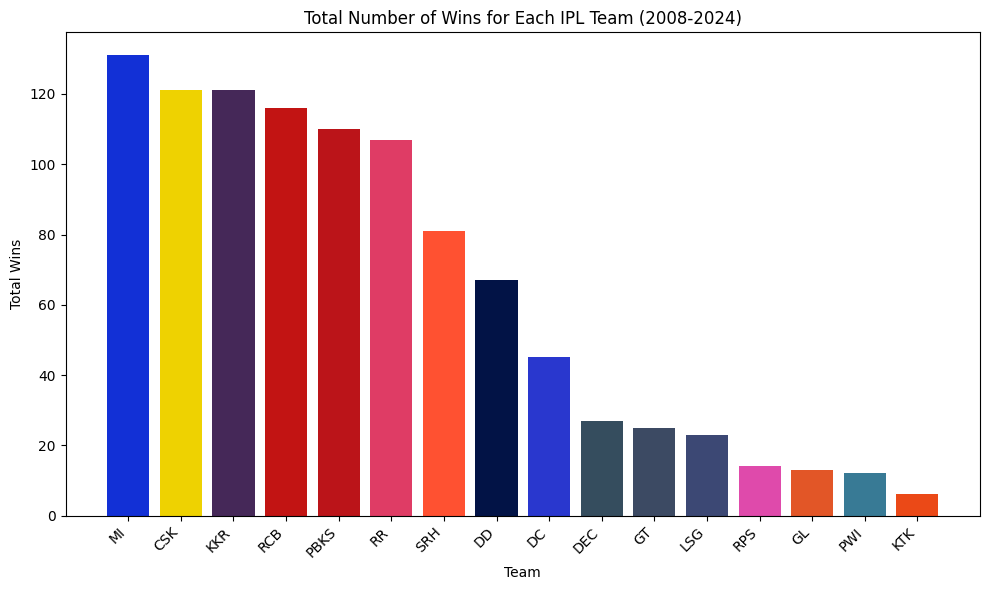

In [3]:
import matplotlib.pyplot as plt

# Aggregate total wins for each team across all years
team_wins = {}
for year, data_dict in all_years_data.items():
    teams = data_dict['team']
    wins = [int(w) for w in data_dict['w']]
    for team, win in zip(teams, wins):
        if team not in team_wins:
            team_wins[team] = 0
        team_wins[team] += win

# Sort teams and wins in descending order of wins
sorted_teams_and_wins = sorted(team_wins.items(), key=lambda x: x[1], reverse=True)
sorted_teams, sorted_wins = zip(*sorted_teams_and_wins)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_teams, sorted_wins, color=[colors[team] for team in sorted_teams])
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.title('Total Number of Wins for Each IPL Team (2008-2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


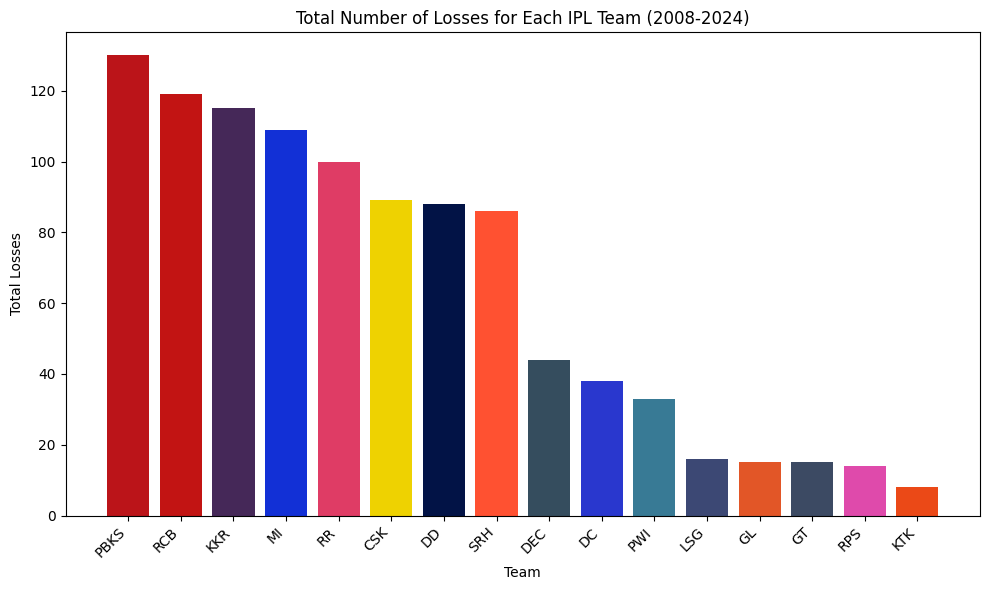

In [4]:
import matplotlib.pyplot as plt

# Aggregate total losses for each team across all years
team_losses = {}
for year, data_dict in all_years_data.items():
    teams = data_dict['team']
    losses = [int(l) for l in data_dict['l']]
    for team, loss in zip(teams, losses):
        if team not in team_losses:
            team_losses[team] = 0
        team_losses[team] += loss

# Sort teams and losses in descending order of losses
sorted_teams_and_losses = sorted(team_losses.items(), key=lambda x: x[1], reverse=True)
sorted_teams, sorted_losses = zip(*sorted_teams_and_losses)

# Plot the bar graph for losses
plt.figure(figsize=(10, 6))
plt.bar(sorted_teams, sorted_losses, color=[colors[team] for team in sorted_teams])
plt.xlabel('Team')
plt.ylabel('Total Losses')
plt.title('Total Number of Losses for Each IPL Team (2008-2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


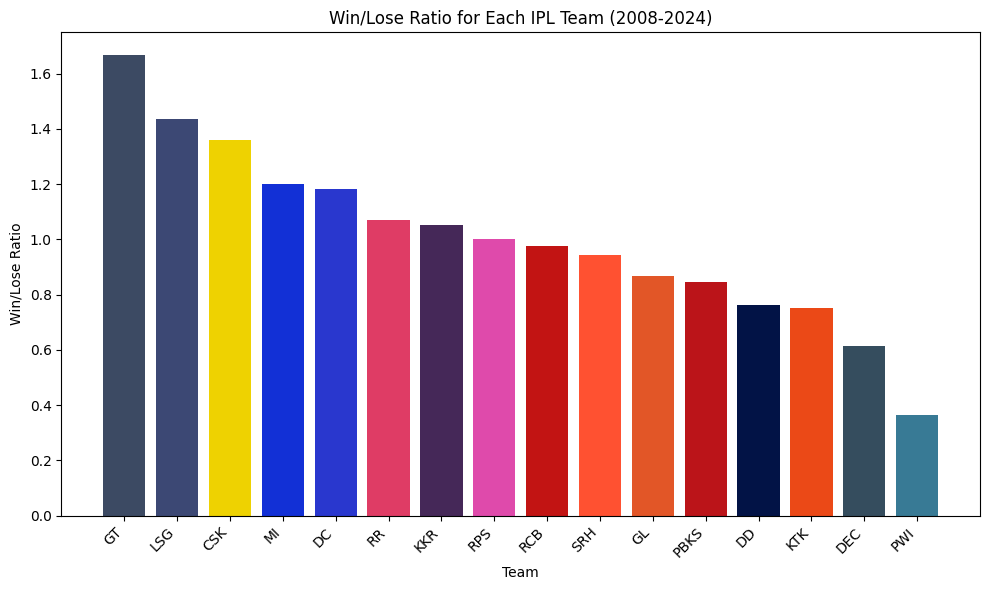

In [5]:
import matplotlib.pyplot as plt

# Calculate win/lose ratio for each team
team_win_lose_ratio = {}
for team in team_wins:
    if team in team_losses:
        win_lose_ratio = team_wins[team] / team_losses[team]
        team_win_lose_ratio[team] = win_lose_ratio

# Sort teams and win/lose ratios in descending order of win/lose ratios
sorted_teams_and_ratios = sorted(team_win_lose_ratio.items(), key=lambda x: x[1], reverse=True)
sorted_teams, sorted_ratios = zip(*sorted_teams_and_ratios)

# Plot the bar graph for win/lose ratio
plt.figure(figsize=(10, 6))
plt.bar(sorted_teams, sorted_ratios, color=[colors[team] for team in sorted_teams])
plt.xlabel('Team')
plt.ylabel('Win/Lose Ratio')
plt.title('Win/Lose Ratio for Each IPL Team (2008-2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


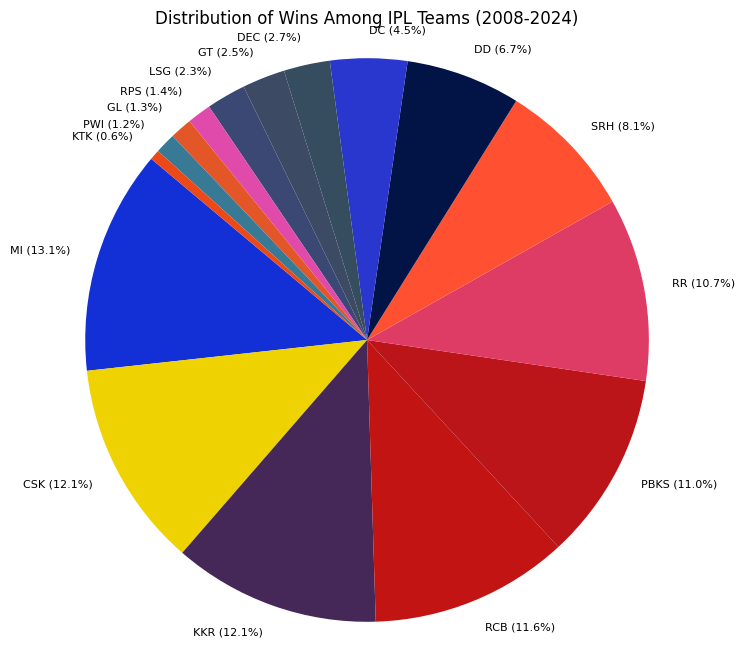

In [6]:
import matplotlib.pyplot as plt

# Create lists of teams and their corresponding wins
teams = list(team_wins.keys())
wins = list(team_wins.values())

# Sort teams and wins in descending order of wins
sorted_teams_and_wins = sorted(zip(teams, wins), key=lambda x: x[1], reverse=True)
sorted_teams, sorted_wins = zip(*sorted_teams_and_wins)

# Create custom labels with team name and percentage divided by 10
labels = [f'{team} ({win/10:.1f}%)' for team, win in zip(sorted_teams, sorted_wins)]

# Plot the pie chart with custom labels
plt.figure(figsize=(8, 8))
plt.pie(sorted_wins, labels=labels, startangle=140, colors=[colors[team] for team in sorted_teams], textprops={'fontsize': 8})
plt.title('Distribution of Wins Among IPL Teams (2008-2024)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


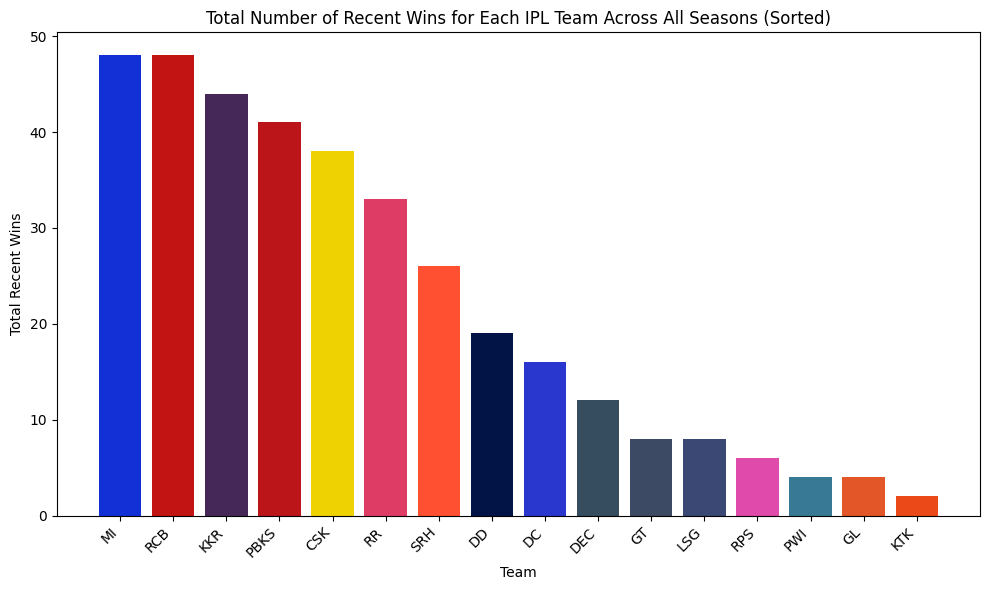

In [7]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store total recent wins for each team
total_recent_wins = {}

# Iterate over all IPL seasons
for year, data_dict in all_years_data.items():
    teams = data_dict['team']
    recent_forms = data_dict['recent form']
    
    # Iterate over each team and their recent form in the current season
    for team, form in zip(teams, recent_forms):
        # Count the number of recent wins (assuming 'W' indicates a win in the recent form)
        recent_wins = form.count('W')
        
        # Add the number of recent wins to the total for the corresponding team
        if team not in total_recent_wins:
            total_recent_wins[team] = 0
        total_recent_wins[team] += recent_wins

# Sort the teams based on the number of recent wins
sorted_teams = sorted(total_recent_wins.items(), key=lambda x: x[1], reverse=True)
teams = [team[0] for team in sorted_teams]
recent_wins = [team[1] for team in sorted_teams]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(teams, recent_wins, color=[colors[team] for team in teams])
plt.xlabel('Team')
plt.ylabel('Total Recent Wins')
plt.title('Total Number of Recent Wins for Each IPL Team Across All Seasons (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


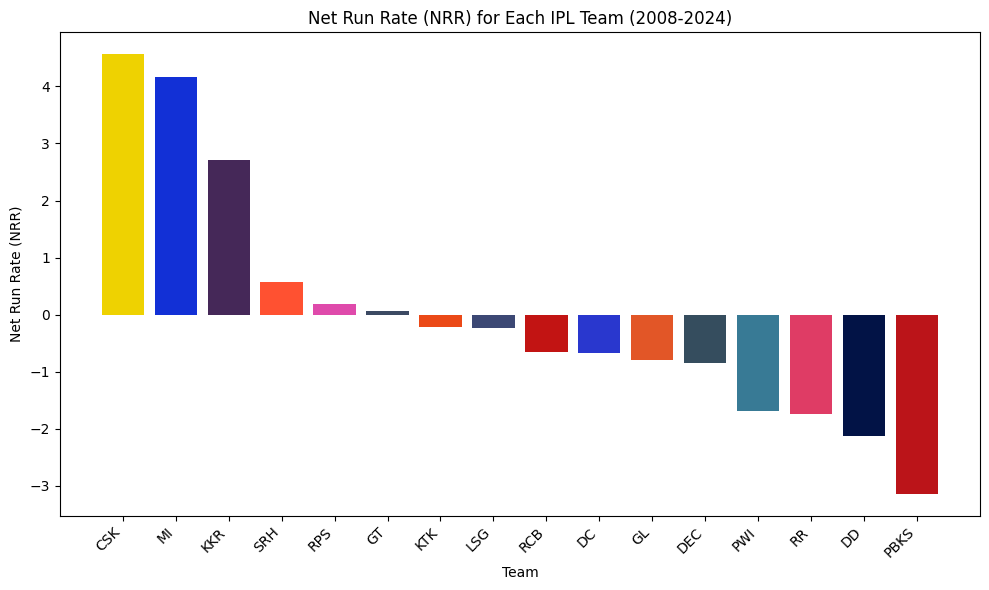

In [8]:
import matplotlib.pyplot as plt

# Aggregate total NRR for each team across all years
team_nrr = {}
for year, data_dict in all_years_data.items():
    teams = data_dict['team']
    nrr = [float(n) for n in data_dict['nrr']]
    for team, nrr_value in zip(teams, nrr):
        if team not in team_nrr:
            team_nrr[team] = 0
        team_nrr[team] += nrr_value

# Sort the team NRR dictionary by values in descending order
sorted_team_nrr = dict(sorted(team_nrr.items(), key=lambda item: item[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_team_nrr.keys(), sorted_team_nrr.values(), color=[colors[team] for team in sorted_team_nrr.keys()])
plt.xlabel('Team')
plt.ylabel('Net Run Rate (NRR)')
plt.title('Net Run Rate (NRR) for Each IPL Team (2008-2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


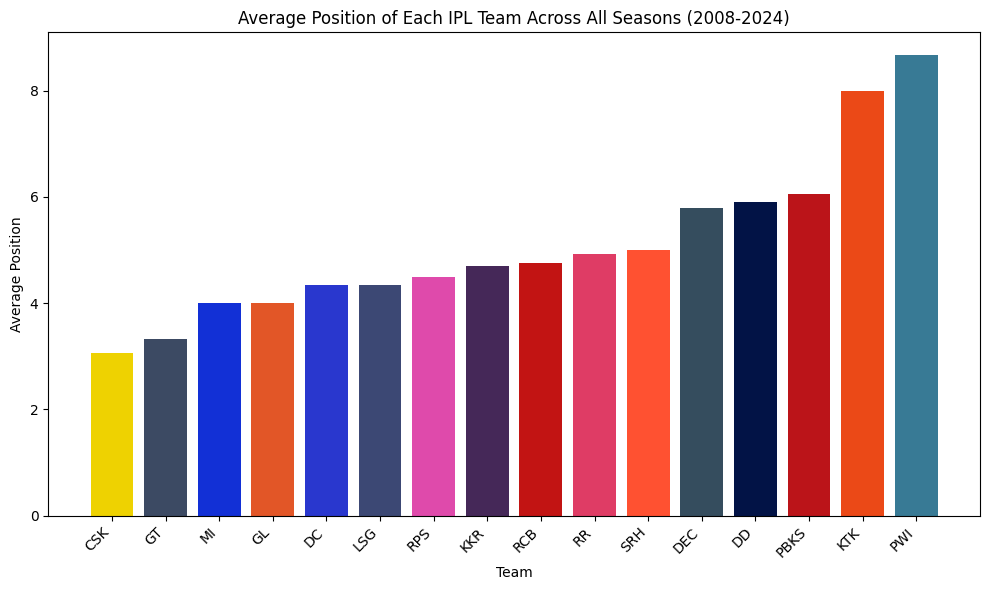

In [9]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store the total position for each team
team_total_positions = {}

# Iterate over all IPL seasons
for year, data_dict in all_years_data.items():
    teams = data_dict['team']
    positions = [int(pos) for pos in data_dict['pos']]
    
    # Add positions to the total positions for each team
    for team, position in zip(teams, positions):
        if team not in team_total_positions:
            team_total_positions[team] = [0] * (max(all_years_data.keys()) - min(all_years_data.keys()) + 1)
        team_total_positions[team][year - 2008] = position

# Calculate the average position for each team across all seasons
team_average_positions = {team: sum(positions) / len([pos for pos in positions if pos != 0]) for team, positions in team_total_positions.items()}

# Sort the team average positions dictionary by values
sorted_team_average_positions = dict(sorted(team_average_positions.items(), key=lambda item: item[1]))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_team_average_positions.keys(), sorted_team_average_positions.values(), color=[colors[team] for team in sorted_team_average_positions.keys()])
plt.xlabel('Team')
plt.ylabel('Average Position')
plt.title('Average Position of Each IPL Team Across All Seasons (2008-2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


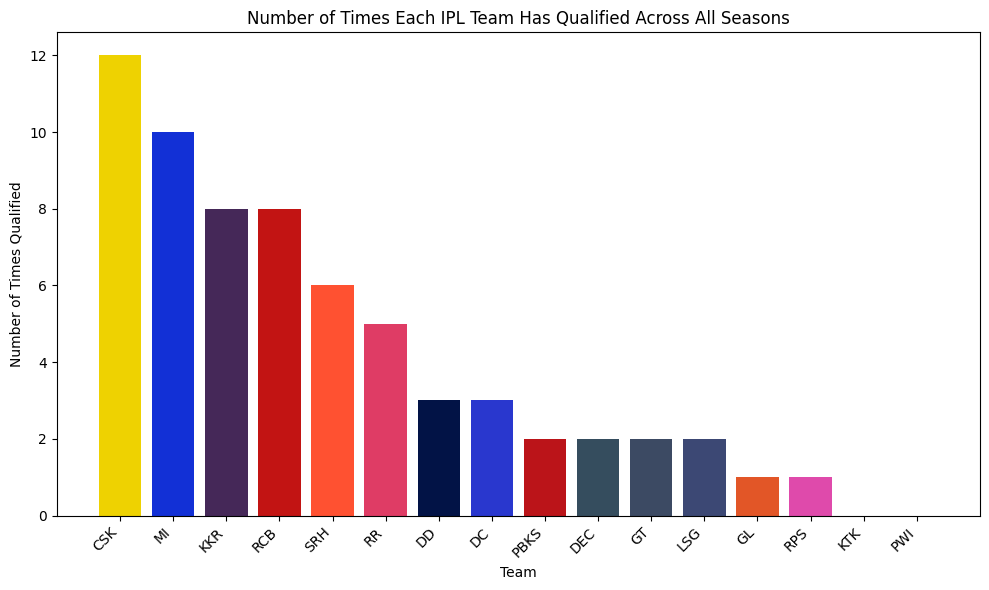

In [10]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store the count of qualified instances for each team
qualified_counts = {}

# Iterate over the years in all_years_data
for data_dict in all_years_data.values():
    for team, qualified in zip(data_dict['team'], data_dict['qualified']):
        if team not in qualified_counts:
            qualified_counts[team] = 0
        qualified_counts[team] += int(qualified)  # Convert 'qualified' to an integer

# Sort the teams based on their qualified counts in descending order
sorted_teams = sorted(qualified_counts.items(), key=lambda x: x[1], reverse=True)
teams, counts = zip(*sorted_teams)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(teams, counts, color=[colors[team] for team in teams])  # Use 'teams' here instead of 'sorted_team_average_positions.keys()'
plt.xlabel('Team')
plt.ylabel('Number of Times Qualified')
plt.title('Number of Times Each IPL Team Has Qualified Across All Seasons')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
import csv

# Define the file name
file_name = 'ipl_points_table_data_2024_teams.csv'

# Gather data for IPL 2024 teams
teams_2024 = all_years_data[2024]['team']

# Initialize dictionaries to store aggregated data for each team
team_wins = {}
team_losses = {}
team_recent_wins = {}
team_nrr = {}
team_positions = {}
team_qualifications = {}  # Store qualified counts for each team

# Iterate over all IPL seasons
for year, data_dict in all_years_data.items():
    teams = data_dict['team']
    wins = [int(w) for w in data_dict['w']]
    losses = [int(l) for l in data_dict['l']]
    recent_forms = data_dict['recent form']
    nrr = [float(n) for n in data_dict['nrr']]
    positions = [int(pos) for pos in data_dict['pos']]
    qualifications = [int(q) for q in data_dict.get('qualified', [0] * len(teams))]  # Use 0 if qualified data is not available
    
    # Update aggregated data for each team
    for team, win, loss, recent_form, nrr_value, position, qualification in zip(teams, wins, losses, recent_forms, nrr, positions, qualifications):
        if team in teams_2024:
            # Aggregate wins and losses
            team_wins[team] = team_wins.get(team, 0) + win
            team_losses[team] = team_losses.get(team, 0) + loss

            # Aggregate recent wins
            team_recent_wins[team] = team_recent_wins.get(team, 0) + recent_form.count('W')

            # Aggregate NRR
            team_nrr[team] = team_nrr.get(team, 0.0) + nrr_value

            # Aggregate positions
            if team not in team_positions:
                team_positions[team] = []
            team_positions[team].append(position)

            # Aggregate qualifications
            team_qualifications[team] = team_qualifications.get(team, 0) + qualification

# Calculate win/loss ratio for IPL 2024 teams
win_loss_ratio_2024 = {team: team_wins[team] / team_losses[team] if team_losses[team] != 0 else team_wins[team] for team in teams_2024}

# Calculate average position for IPL 2024 teams
average_position_2024 = {team: sum(positions) / len(positions) if positions else 0 for team, positions in team_positions.items()}

# Write data to CSV file
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    writer.writerow(['Team', 'Total Wins', 'Total Losses', 'Win/Loss Ratio', 'Recent Wins', 'NRR', 'Average Position', 'Qualified Count'])
    
    # Write data for each team
    for team in teams_2024:
        writer.writerow([team, team_wins.get(team, 0), team_losses.get(team, 0), win_loss_ratio_2024.get(team, 0), team_recent_wins.get(team, 0), team_nrr.get(team, 0), average_position_2024.get(team, 0), team_qualifications.get(team, 0)])

print(f'Data exported successfully to {file_name}')


Data exported successfully to ipl_points_table_data_2024_teams.csv


In [15]:
import csv

# Define the file name
file_name = 'ipl_points_table_data_all_teams.csv'

# Gather data for all IPL teams across all seasons
all_teams = set()
for data_dict in all_years_data.values():
    all_teams.update(data_dict['team'])

# Initialize dictionaries to store aggregated data for each team
team_wins_all = {team: 0 for team in all_teams}
team_losses_all = {team: 0 for team in all_teams}
team_recent_wins_all = {team: 0 for team in all_teams}
team_nrr_all = {team: 0.0 for team in all_teams}
team_positions_all = {team: [] for team in all_teams}
team_qualifications_all = {team: 0 for team in all_teams}

# Iterate over all IPL seasons
for year, data_dict in all_years_data.items():
    teams = data_dict['team']
    wins = [int(w) for w in data_dict['w']]
    losses = [int(l) for l in data_dict['l']]
    recent_forms = data_dict['recent form']
    nrr = [float(n) for n in data_dict['nrr']]
    positions = [int(pos) for pos in data_dict['pos']]
    qualifications = [int(q) for q in data_dict.get('qualified', [0] * len(teams))]  # Use 0 if qualified data is not available
    
    # Update aggregated data for each team
    for team, win, loss, recent_form, nrr_value, position, qualification in zip(teams, wins, losses, recent_forms, nrr, positions, qualifications):
        # Aggregate wins and losses
        team_wins_all[team] += win
        team_losses_all[team] += loss

        # Aggregate recent wins
        team_recent_wins_all[team] += recent_form.count('W')

        # Aggregate NRR
        team_nrr_all[team] += nrr_value

        # Aggregate positions
        team_positions_all[team].append(position)

        # Aggregate qualifications
        team_qualifications_all[team] += qualification

# Calculate win/loss ratio for all IPL teams
win_loss_ratio_all = {team: team_wins_all[team] / team_losses_all[team] if team_losses_all[team] != 0 else team_wins_all[team] for team in all_teams}

# Calculate average position for all IPL teams
average_position_all = {team: sum(positions) / len(positions) if positions else 0 for team, positions in team_positions_all.items()}

# Write data to CSV file for all seasons
with open(file_name, mode='w', newline='') as file_all_seasons:
    writer_all_seasons = csv.writer(file_all_seasons)
    
    # Write header
    writer_all_seasons.writerow(['Team', 'Total Wins', 'Total Losses', 'Win/Loss Ratio', 'Recent Wins', 'NRR', 'Average Position', 'Qualified Count'])
    
    # Write data for each team
    for team in all_teams:
        writer_all_seasons.writerow([team, team_wins_all[team], team_losses_all[team], win_loss_ratio_all[team], team_recent_wins_all[team], team_nrr_all[team], average_position_all[team], team_qualifications_all[team]])

print(f'Data exported successfully to {file_name}')


Data exported successfully to ipl_points_table_data_all_teams.csv
